### Discription:
This is Iteration 2 for Housing prices competition and will cover a simple deeplearning approach towards predicting the house prices.

This notebook will follow a simple approach as follows:
* Data preprocesing using **scikit-learn**
* Model training and evaluation in **Keras**

## Importing the files as a pandas Dataframe:

In [1]:
import pandas as pd

train_df = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')
train_df.head() #to check if data is safely loaded

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
train_df.info()
print(train_df.isna().sum().to_string())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

On inspection of data we can conclude that 
1. All the features are mostly of the following Dtype:
    * int
    * float
    * object
      
2. Many of the features consist of missing vlaues
3. Total number of samples = 1460
4. Some features like 'Id' are redundent

## Seperating target and features:

In [3]:
X = train_df.drop('SalePrice',axis=1)
y = train_df['SalePrice']

## Dropping redundent features:

In [4]:
X = X.drop('Id',axis=1)
print(X.columns) #checking once again just in case 

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## Data Preprocessing Pipeline:
### Handling missing values via 'Inputing':
* The categorical values that are missing can be labelled 'missing', it wont make sense to impute the missing values with most_frequent values since in some cases the number of missing values is more than 70%
* The numerical(int/float) values that are missing can be imputed with the median of the column
### Normalization:
* Applying StandardScaling for normalization which is (x-mean)/std, because they all are in different scales

In [5]:
#seperating categorical and numerical features
num_cols = X.select_dtypes(include='number').columns
obj_cols = X.select_dtypes(include='object').columns

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#forming pipelines for data preprocessing
num_pipe = Pipeline([
    ('Imputer',SimpleImputer(strategy='median')),
    ('Scaler',StandardScaler())
])
obj_pipe = Pipeline([
    ('Imputer',SimpleImputer(strategy='constant',fill_value='missing')),
    ('Encoder',OneHotEncoder(handle_unknown='ignore',
                            sparse_output=False)) #wont give out a sparse matrix as output, now can use numpy methods on it 
])

In [7]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('num',num_pipe,num_cols),
    ('obj',obj_pipe,obj_cols)
])

## Getting the data ready:
Completing the preprocessing and preparing the validation set 

In [8]:
#preprocessing the training data
X_processed = preprocessor.fit_transform(X)

In [9]:
#number of features
print(X_processed.shape) #number of input features now are 303

(1460, 303)


In [10]:
from sklearn.model_selection import train_test_split

#splitting the data into train/validate split
X_train,X_val,y_train,y_val = train_test_split(X_processed,y,random_state=42,test_size=0.2)

## Preparing model in Keras:

2026-02-04 17:11:15.800486: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1770225076.144502      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1770225076.243350      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1770225077.058654      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770225077.058713      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770225077.058717      55 computation_placer.cc:177] computation placer alr

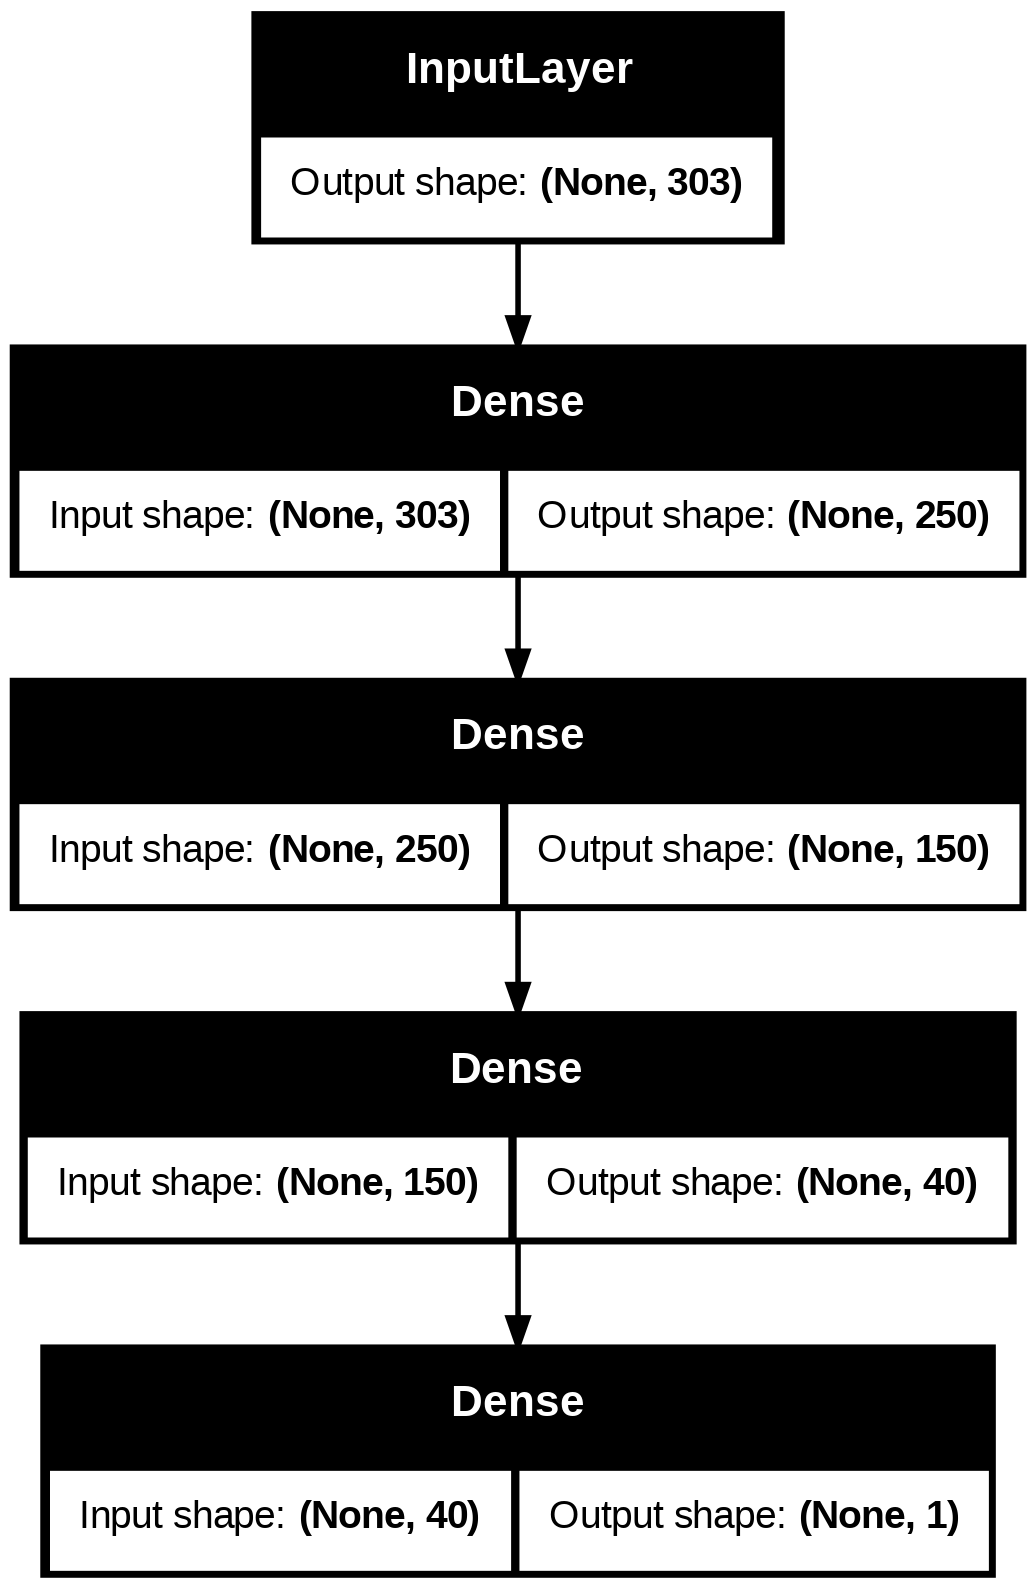

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

#preparing a model using Functional API
inputs = keras.Input(shape=(303,)) #number of features increased from 79
features = layers.Dense(250, activation='relu', name='layer_1') (inputs)
features = layers.Dense(150, activation='relu', name='layer_2') (features)
features = layers.Dense(40, activation='relu', name='layer_3') (features)
outputs = layers.Dense(1, name='output_layer') (features)

model = keras.Model(inputs=inputs, outputs=outputs)
keras.utils.plot_model(model, 'regression_model.png', show_shapes=True)

* The model was kept simple and minial since the data was limited, the capacity of the layers was maintained.
* Activations used : 'Rectified Linear Unit(ReLU)'
* The output layer doesnt have any activation since the goal is a regression model/ tp predict a continious value not a category/class.

## Compiling and evaluating the model:

In [12]:
model.compile(optimizer='rmsprop',
             loss = 'mean_squared_error',
             metrics= ['root_mean_squared_error'])

history = model.fit(X_train,y_train,
             batch_size=15,
             epochs=450,
             validation_data=(X_val,y_val),
             verbose=0)

print(history.history.keys())

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])


The choice of optimizer and loss function was on the following basis:
* The optimizer = 'rmsprop' is usually a good default optimizer for any problem.
* Loss function used was 'mean_squared_error', since it heavily panelizes large errors.

In [13]:
train_loss = history.history['loss'] 
train_rmse = history.history['root_mean_squared_error']
val_loss = history.history['val_loss']
val_rmse = history.history['val_root_mean_squared_error']

## Plotting the graphs:

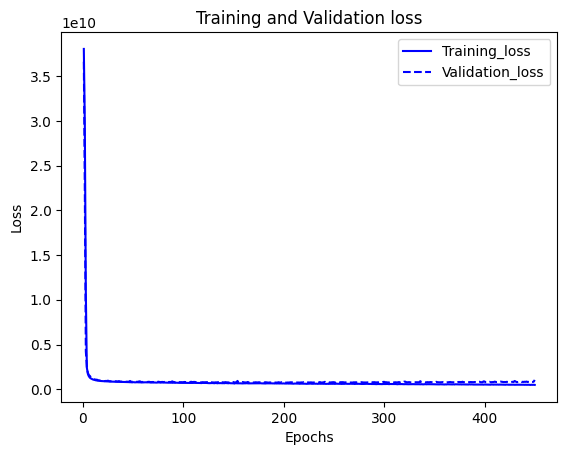

In [14]:
import matplotlib.pyplot as plt

epochs = 450

# val_loss and train_loss vs Epochs
plt.plot(range(1,epochs+1),train_loss,'b-', label='Training_loss')
plt.plot(range(1,epochs+1),val_loss,'b--', label='Validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation loss')
plt.show()

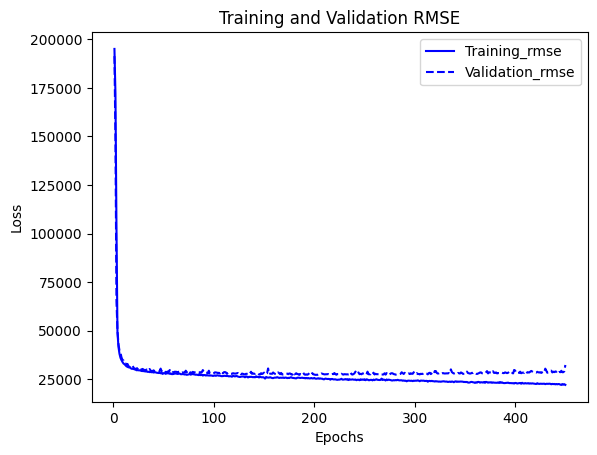

In [15]:
# val_rmse and train_rmse vs Epochs
plt.plot(range(1,epochs+1),train_rmse,'b-', label='Training_rmse')
plt.plot(range(1,epochs+1),val_rmse,'b--', label='Validation_rmse')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation RMSE')
plt.show()

The validation loss as well as RMSE seem to be depleating with every epoch till epoch 400, so we'll train the final model before predictions till 400 epochs and then make predictions on the test data

In [16]:
#Final Model

inputs = keras.Input(shape=(303,)) #number of features increased from 79
features = layers.Dense(250, activation='relu', name='layer_1') (inputs)
features = layers.Dense(150, activation='relu', name='layer_2') (features)
features = layers.Dense(40, activation='relu', name='layer_3') (features)
outputs = layers.Dense(1, name='output_layer') (features)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='rmsprop',
             loss = 'mean_squared_error',
             metrics= ['root_mean_squared_error'])

model.fit(X_processed,y,
            batch_size=15,
            epochs=400,
            verbose=0)

## Importing the test data:

In [17]:
test_df = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [18]:
#dropping Id so that the data could be preprocessed
df = test_df.drop('Id',axis=1)

## Performing same preprocessing as done on train data:

In [19]:
X_test = preprocessor.transform(df)

## Making predictions on the test data:

In [20]:
y_pred = model.predict(X_test)
y_pred = y_pred.flatten() #converting the 2D y_Pred array into 1D

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


## Making the submission csv:

In [25]:
submission = pd.DataFrame({
    'Id' : test_df['Id'],
    'SalePrice' : y_pred
})

submission.to_csv('submission.csv',index=False)